In [50]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules


### Carga de dados

In [3]:
df_transacoes = pd.read_csv('./datasets/data.csv')

In [4]:
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4539 entries, 0 to 4538
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   POS Txn  4539 non-null   uint64
 1   Dept     4539 non-null   object
 2   ID       4539 non-null   int64 
 3   Sales U  4539 non-null   int64 
dtypes: int64(2), object(1), uint64(1)
memory usage: 142.0+ KB


In [5]:
df_transacoes.head(10)

,POS Txn,Dept,ID,Sales U
0,16120100160021008773,0261:HOSIERY,250,2
1,16120100160021008773,0634:VITAMINS & HLTH AIDS,102,1
2,16120100160021008773,0879:PET SUPPLIES,158,2
3,16120100160021008773,0973:CANDY,175,2
4,16120100160021008773,0982:SPIRITS,176,1
5,16120100160021008773,0983:WINE,177,4
6,16120100160021008773,0991:TOBACCO,179,2
7,16120100160021008774,0597:HEALTH AIDS,93,1
8,16120100160021008774,0604:PERSONAL CARE,100,5
9,16120100160021008775,0819:PRE-RECORDED A/V,135,1


### EDA

In [6]:
#renomear as colunas
df_transacoes.rename(columns={'POS Txn': 'ID_Transacao', 'Dept': 'Departamento', 'ID': 'ID_Deoartamento', 'Sales U': 'Qtde_Vendida'}, inplace=True)

In [7]:
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4539 entries, 0 to 4538
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID_Transacao     4539 non-null   uint64
 1   Departamento     4539 non-null   object
 2   ID_Deoartamento  4539 non-null   int64 
 3   Qtde_Vendida     4539 non-null   int64 
dtypes: int64(2), object(1), uint64(1)
memory usage: 142.0+ KB


In [15]:
#Quantidade de departamentos
df_transacoes['ID_Deoartamento'].nunique()

156

In [14]:
#Quantidade de trnasacoes
df_transacoes['ID_Transacao'].nunique()

1943

In [11]:
#Um departamento pode aparecer mais de uma vez em uma transação?
(len(df_transacoes.groupby(['ID_Transacao', 'Departamento'])) != len(df_transacoes))

False

In [16]:
#Checar se ha quantidades negativas e iguais a zero
len(df_transacoes[df_transacoes['Qtde_Vendida'] <=0])

0

In [18]:
#Remover as linhas com quantidades vendidas <=0
df_transacoes = df_transacoes[df_transacoes['Qtde_Vendida'] > 0]

In [27]:
#QUais departamentos tem maior volume de transações e maior quantidade de unidades vendidas
#Quantidade de transações unicas onde cada departamento aparece
contagem_transacoes_por_departamento = df_transacoes.value_counts('Departamento')

fig_volume_transacoes = px.bar(contagem_transacoes_por_departamento, color=contagem_transacoes_por_departamento.index, orientation='h')
fig_volume_transacoes.update_layout(showlegend=False)
fig_volume_transacoes.show()


In [26]:
#top 10
contagem_top10_por_departamento = df_transacoes.value_counts('Departamento').head(10)

fig_volume_top10 = px.bar(contagem_top10_por_departamento, color=contagem_top10_por_departamento.index, orientation='h')
fig_volume_top10.update_layout(showlegend=False)
fig_volume_top10.show()


In [25]:
#Soma de unidades vendidas das transações onde cada departamento aparece
soma_qtde_por_departamento = df_transacoes.groupby('Departamento')['Qtde_Vendida'].sum().sort_values(ascending=False)


unidades_vendidas = px.bar(soma_qtde_por_departamento, color=soma_qtde_por_departamento.index, orientation='h')
unidades_vendidas.update_layout(showlegend=False)
unidades_vendidas.show()


In [28]:
#top 10
#Soma de unidades vendidas das transações onde cada departamento aparece
soma_qtde_top10 = df_transacoes.groupby('Departamento')['Qtde_Vendida'].sum().sort_values(ascending=False).head(10)


unidades_vendidas_10 = px.bar(soma_qtde_top10, color=soma_qtde_top10.index, orientation='h')
unidades_vendidas_10.update_layout(showlegend=False)
unidades_vendidas_10.show()


In [32]:
#Unificar dois grafico top 10 lado a lado
#criar subplots
fig_pergunta_1 = make_subplots(rows=1, cols=2, subplot_titles=('Volume de Transações', 'Unidades Vendidas'))

for trace in fig_volume_top10['data']:
    fig_pergunta_1.add_trace(trace, row=1, col=1)

for trace in unidades_vendidas_10['data']:
    fig_pergunta_1.add_trace(trace, row=1, col=2)


fig_pergunta_1.update_layout(showlegend=False, height=800, width=1000)
fig_pergunta_1.show()


In [31]:
# Quais deptos tem a maior variação nas unidades vendidas por transação?
#Calcular o desvio padra das quantidades vendidas agrupando o departamento

desvio_padrao_qtde_top20 = df_transacoes.groupby('Departamento')['Qtde_Vendida'].std().sort_values(ascending=False).head(20)



fig_variacao_unidades_vendidas_top20 = px.bar(desvio_padrao_qtde_top20, color=desvio_padrao_qtde_top20.index, orientation='h')
fig_variacao_unidades_vendidas_top20.update_layout(showlegend=False)
fig_variacao_unidades_vendidas_top20.show()


In [34]:
#QUal é a distribuição de unidades vendidas por departamento nas diferentes transações
#avaliar as medidas de posições da variavel qtde vendida
px.box(df_transacoes, x='Departamento', y='Qtde_Vendida')

In [35]:
# Quais deptos tem a maior variação nas unidades vendidas por transação?
# calcular a média das quantidades vendidas, agrupando por departamento
media_qtde_top20 = df_transacoes.groupby('Departamento')['Qtde_Vendida'].mean().sort_values(ascending=False).head(20)



fig_media_unidades_vendidas_top20 = px.bar(media_qtde_top20, color=media_qtde_top20.index, orientation='h')
fig_media_unidades_vendidas_top20.update_layout(showlegend=False)
fig_media_unidades_vendidas_top20.show()


In [38]:
#Unificar dois grafico top 20 lado a lado
#criar subplots
fig_pergunta_4 = make_subplots(rows=1, cols=2, subplot_titles=('Desvio padrão', 'Média'))

for trace in fig_variacao_unidades_vendidas_top20['data']:
    fig_pergunta_4.add_trace(trace, row=1, col=1)

for trace in fig_media_unidades_vendidas_top20['data']:
    fig_pergunta_4.add_trace(trace, row=1, col=2)


fig_pergunta_4.update_layout(showlegend=False, height=800, width=4000)
fig_pergunta_4.show()


### Preparação da base com pivot table

In [39]:
# Criar uma pivot table com o id de transação e depto como coluna, soma de qtde vendida como valor
df_transacoes_pivot = df_transacoes.pivot_table(index='ID_Transacao', 
                                                columns='Departamento',
                                                values='Qtde_Vendida',
                                                aggfunc=sum)

C:\Users\ThayanneCristinedaSi\AppData\Local\Temp\ipykernel_14484\1656305424.py:2: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [40]:
df_transacoes_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1943 entries, 16120100160021008773 to 16120100160221001467
Columns: 156 entries, 0002:BARBER RETAIL to 0999:UNSCANNED ITEMS
dtypes: float64(156)
memory usage: 2.3 MB


In [48]:
df_transacoes_pivot.head(20)

,0002:BARBER RETAIL,0009:FLORAL SERV/SUPPLIES,0012:LOCAL GIFTS/FOODS,0014:REPAIRS,0016:FINANCIAL SERVICES,0018:OTHER DIRECT SERVICE,0033:VENDING RETAIL,0056:SOUVENIR,0066:VENDING/AMUSEMENT MA,0071:BEAUTY RETAIL,...,0941:BEDDING,0961:GENERAL GROCERIES,0962:BEVERAGES,0965:PERISHABLES,0973:CANDY,0982:SPIRITS,0983:WINE,0984:BEER,0991:TOBACCO,0999:UNSCANNED ITEMS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [42]:
#converter os dados da pivot table para boolean
df_transacoes_pivot = df_transacoes_pivot.map(lambda x: True if x > 0 else False)

In [44]:
#remover titulo
df_transacoes_pivot = df_transacoes_pivot.rename_axis(None, axis=1)

In [45]:
#remover coluna id 
df_transacoes_pivot.reset_index(inplace=True)

In [47]:
df_transacoes_pivot.drop(columns=['ID_Transacao'], axis=1, inplace=True)

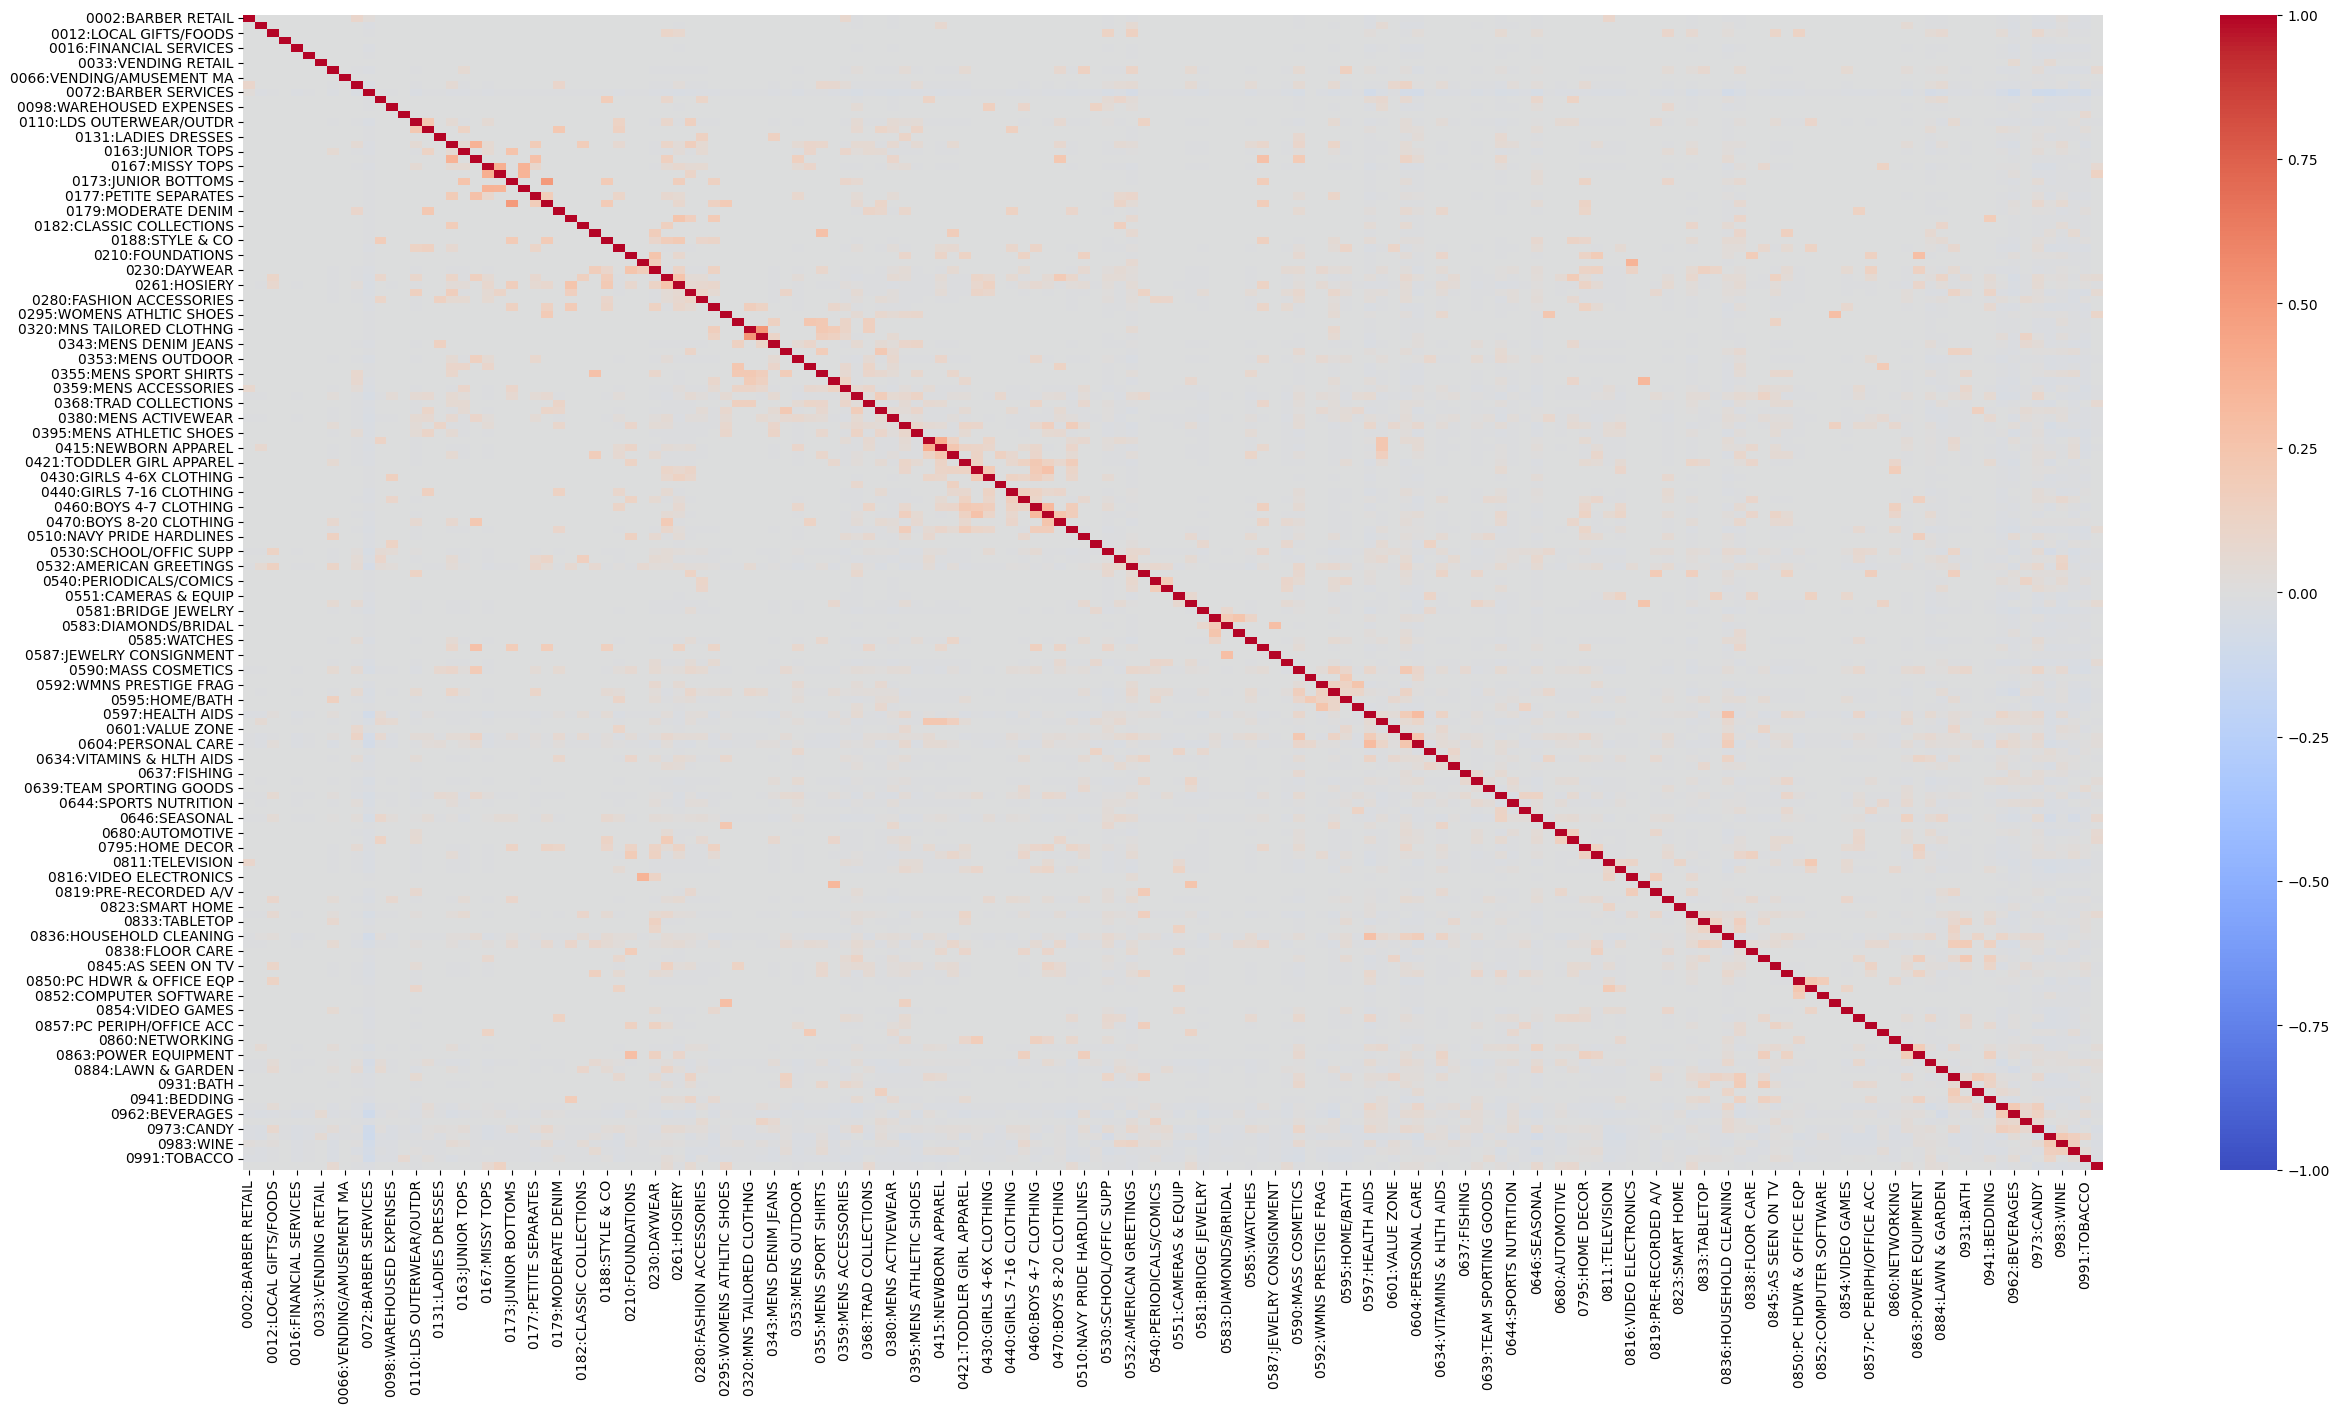

In [49]:
# Qual a correlação entre os departamentos
associacao_departamentos = df_transacoes_pivot.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(associacao_departamentos, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.show()

### Realizar basket analysis com apriori

In [51]:
# obter uma lista de itemsets frequentes

# suporte entre 2 a 5%
# cobertura adequada = 40 a 100 trnsações 
# diversidade de dptos sem ser muito restritivo

itemsets_frequentes = apriori(df_transacoes_pivot, min_support=0.02, use_colnames=True, verbose=1)

Processing 165 combinations | Sampling itemset size 3


In [52]:
#QUantos itemssets froam selecionados
len(itemsets_frequentes)

36

In [53]:
#criar uma coluna para armazenar o tamanho do itemset
itemsets_frequentes['tamanho'] = itemsets_frequentes['itemsets'].apply(lambda x:len(x))

In [54]:
itemsets_frequentes

,support,itemsets,tamanho
0,0.057643,(0072:BARBER SERVICES),1
1,0.024704,(0360:MENS FURNISHINGS),1
2,0.024189,(0380:MENS ACTIVEWEAR),1
3,0.027277,(0530:SCHOOL/OFFIC SUPP),1
4,0.053011,(0532:AMERICAN GREETINGS),1
5,0.026248,(0590:MASS COSMETICS),1
6,0.022645,(0593:PRESTIGE COSMETICS),1
7,0.102934,(0597:HEALTH AIDS),1
8,0.067936,(0603:BEAUTY CARE),1
9,0.077200,(0604:PERSONAL CARE),1


In [55]:
# filtrar 2 dptos
itemsets_frequentes[itemsets_frequentes.tamanho ==2]

,support,itemsets,tamanho
24,0.021616,"(0603:BEAUTY CARE, 0597:HEALTH AIDS)",2
25,0.032939,"(0597:HEALTH AIDS, 0604:PERSONAL CARE)",2
26,0.031395,"(0836:HOUSEHOLD CLEANING, 0597:HEALTH AIDS)",2
27,0.023160,"(0973:CANDY, 0597:HEALTH AIDS)",2
28,0.021101,"(0603:BEAUTY CARE, 0604:PERSONAL CARE)",2
29,0.022131,"(0961:GENERAL GROCERIES, 0962:BEVERAGES)",2
30,0.020072,"(0961:GENERAL GROCERIES, 0973:CANDY)",2
31,0.034483,"(0973:CANDY, 0962:BEVERAGES)",2
32,0.025219,"(0962:BEVERAGES, 0982:SPIRITS)",2
33,0.039629,"(0983:WINE, 0982:SPIRITS)",2


In [57]:
#validar informação de suporte
#suporte = transações onde o itemset aparece / total de trnsações
transacoes_spirits = len(df_transacoes_pivot[df_transacoes_pivot['0982:SPIRITS'] == True])
total_transacoes = len(df_transacoes_pivot)
suporte_spirits = transacoes_spirits / total_transacoes
print(f'Suporte spirits {suporte_spirits}')

Suporte spirits 0.16160576428203807


In [60]:
#criar regras de associação com base nos itemsets frequentes (20%)
# usando confiança de 40%
regras_associacao = association_rules(itemsets_frequentes, metric='confidence', min_threshold=0.2)
regras_associacao

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(0603:BEAUTY CARE),(0597:HEALTH AIDS),0.067936,0.102934,0.021616,0.318182,3.091136,1.0,0.014623,1.315697,0.725803,0.144828,0.239947,0.264091
1,(0597:HEALTH AIDS),(0603:BEAUTY CARE),0.102934,0.067936,0.021616,0.210000,3.091136,1.0,0.014623,1.179828,0.754119,0.144828,0.152419,0.264091
2,(0597:HEALTH AIDS),(0604:PERSONAL CARE),0.102934,0.077200,0.032939,0.320000,4.145067,1.0,0.024992,1.357059,0.845812,0.223776,0.263112,0.373333
3,(0604:PERSONAL CARE),(0597:HEALTH AIDS),0.077200,0.102934,0.032939,0.426667,4.145067,1.0,0.024992,1.564651,0.822225,0.223776,0.360880,0.373333
4,(0836:HOUSEHOLD CLEANING),(0597:HEALTH AIDS),0.081318,0.102934,0.031395,0.386076,3.750728,1.0,0.023024,1.461201,0.798301,0.205387,0.315631,0.345538
5,(0597:HEALTH AIDS),(0836:HOUSEHOLD CLEANING),0.102934,0.081318,0.031395,0.305000,3.750728,1.0,0.023024,1.321845,0.817537,0.205387,0.243482,0.345538
6,(0597:HEALTH AIDS),(0973:CANDY),0.102934,0.141534,0.023160,0.225000,1.589727,1.0,0.008591,1.107698,0.413527,0.104651,0.097227,0.194318
7,(0603:BEAUTY CARE),(0604:PERSONAL CARE),0.067936,0.077200,0.021101,0.310606,4.023384,1.0,0.015857,1.338567,0.806225,0.170124,0.252932,0.291970
8,(0604:PERSONAL CARE),(0603:BEAUTY CARE),0.077200,0.067936,0.021101,0.273333,4.023384,1.0,0.015857,1.282657,0.814319,0.170124,0.220368,0.291970
9,(0961:GENERAL GROCERIES),(0962:BEVERAGES),0.050952,0.130211,0.022131,0.434343,3.335689,1.0,0.015496,1.537663,0.737805,0.139159,0.349662,0.302152
